In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
ames_housing = pd.read_csv('C:/Users/Process Research/Downloads/Springboard Assignments/House Prices Advanced Regression Techniques/train.csv')

In [3]:
ames_housing_e = ames_housing.set_index('Id')

In [4]:
ames_housing_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
ames_housing_e.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The above dataframe contains prevalent data that we could look to infer relationships from, however it is not possible to determine any relationships from a dataframe containing columns with string values. As such, the non-numerical columns need to be removed.

In [6]:
ames_housing_nums = ames_housing_e.select_dtypes(['number'])

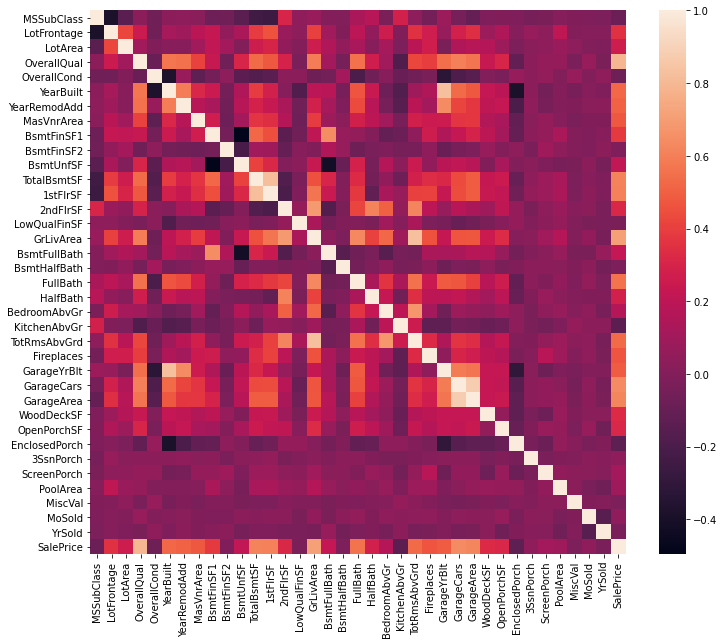

In [7]:
ames_housing_nums
#Show a seaborn heatmap of correlations in ski_data
#Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12,10))
sns.heatmap(ames_housing_e.corr());

Upon removing the non-numerical columns from the dataframe, it became possible to build a heatmap with the purpose of viewing which housing attributes have a strong, positive linear relationship. Some of the attributes with strong linear relationships are: 1. Sale Price & Overall Quality, 2. Gr Liv Area & Sale Price, 3. Garage Area & Garage Cars, 4.Garage Year Built & Year Built, and 5. Total Rooms Above Ground & Gr Liv Area. There is an inverse relationship between Year Built and Overall Condition.

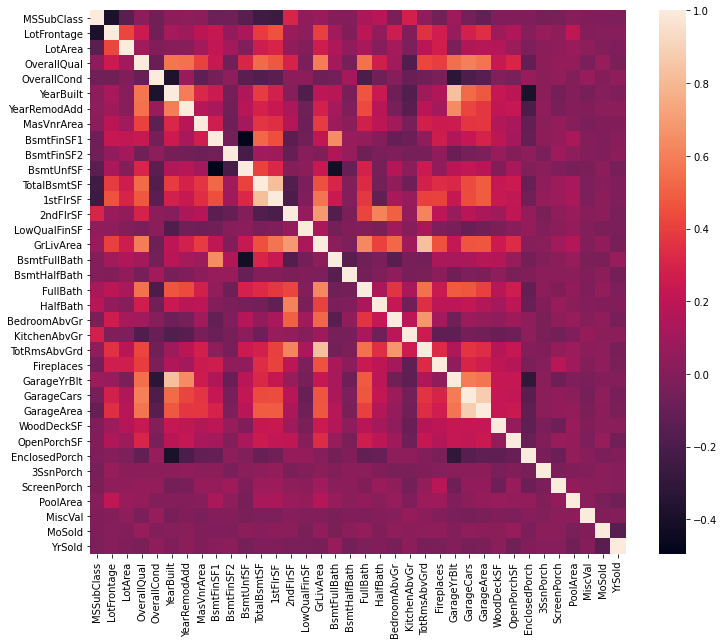

In [8]:
ames_housing_nums_1 = ames_housing_nums.drop(columns=['SalePrice'], axis=1)
plt.subplots(figsize=(12,10))
sns.heatmap(ames_housing_nums_1.corr());

After removing the target value to assess what other linear relationships were in existence, the remaining housing attributes relationships have thus far remained the same.

In [9]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'SalePrice', data=ames_housing_nums, alpha=0.5)
        ax.set(xlabel=col, ylabel='House price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [10]:
features = [p for p in ames_housing_nums.columns]

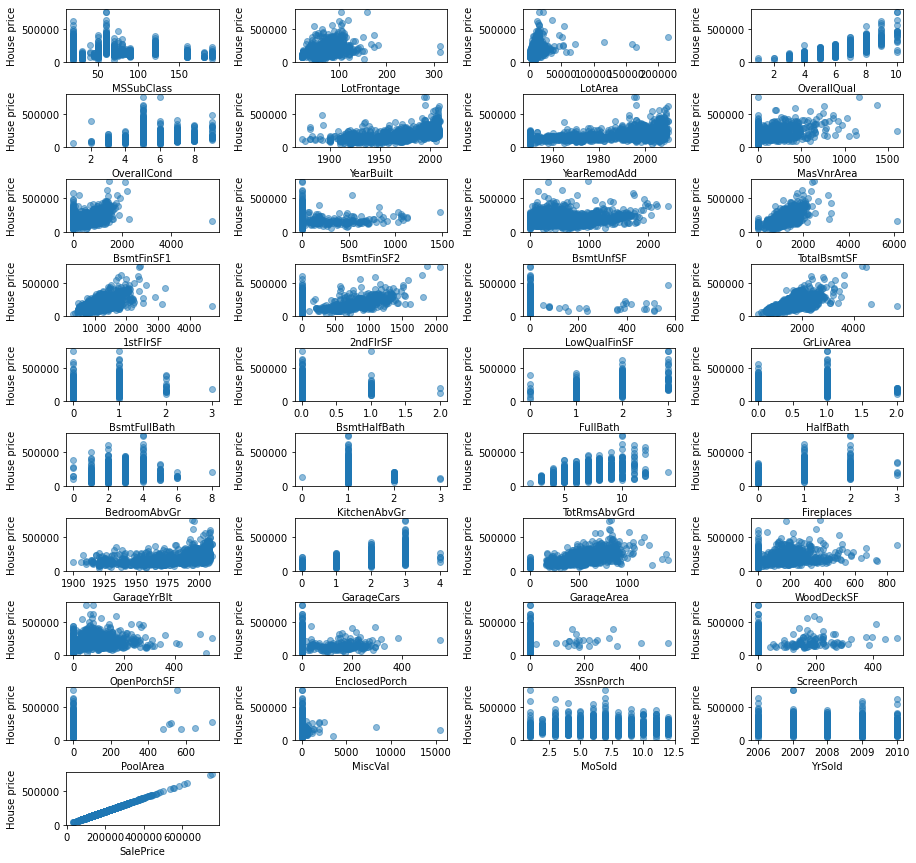

In [11]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with Overall Quality. Year Built seems useful. Year Remodeled Add, Ground Living Area, and Basement Sq. Ft. appear quite similar and also useful. The obvious correlation with quality makes absolute sense, however the relationship with Overall Condition, while trending positively, isn't perfectly linear, however it passes the eye test. What we can infer from this is that the age of the building plays a huge part in determining its price, as newer buildings may be more modern with more amenities, or simply be more secure. It is also not a revelation to find out that the area of the house's ground floor, basement or garage area determine the price, with there being a positive trend on that front as well.